### **Setup Environment, Compile C++ Codes, and Import Dependencies**

This assignment requires us to understand and apply traditional image processing techniques. Considering the efficiency of pixel traversal, I plan to use C++ as the main language and then package it into a Python package to provide an API for use in a Python notebook. I am using the third-party library pybind11 to package the C++ code. If the packaging doesn’t work, you can place the provided package in the modules folder; this package is simply a compilation of the C++ code under the scripts directory.

In [1]:
# Run the compiler
!python compile.py

running build_ext
copying build\lib.win-amd64-cpython-312\image_processing.cp312-win_amd64.pyd -> 
Removed existing file: modules\image_processing.cp312-win_amd64.pyd
Moved image_processing.cp312-win_amd64.pyd to modules

Success!


In [2]:
from modules import *

### **Image Processing**

Before proceeding with image processing, I encapsulated an `Image` class to store information about the image, including its height, width, bytes per pixel, raw data, and so on. I then specified that the methods for image processing must be static and return a new image to ensure that the original image information remains unchanged. This principle will always apply: the image's data is read-only and cannot be modified.

For detailed API information, please refer to the `README.md` file.

---

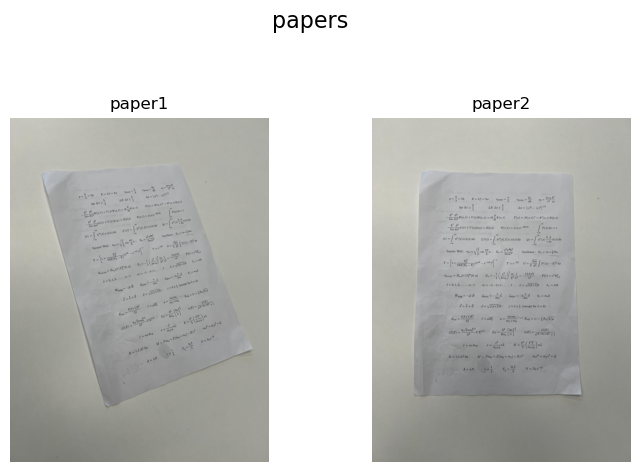

In [3]:
paper1 = Image(1536, 2048, 3)
paper1.load("images/Project/paper1.raw")
# paper1 = paper1.scale(paper1, 0.2, 0.2)

paper2 = Image(1536, 2048, 3)
paper2.load("images/Project/paper2.raw")
# paper2 = paper2.scale(paper2, 0.2, 0.2)

show_images([paper1, paper2], ["paper1", "paper2"], "papers")

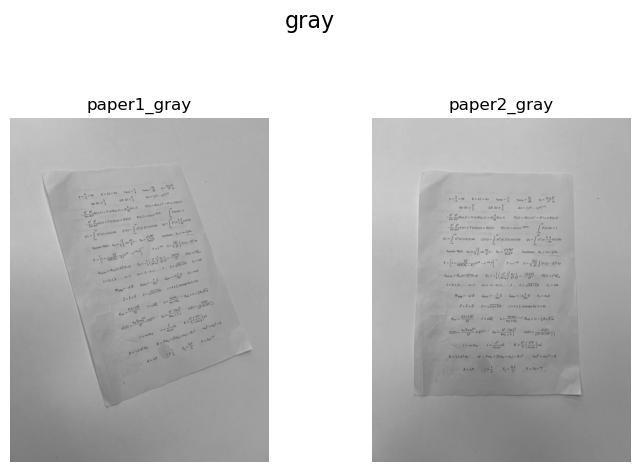

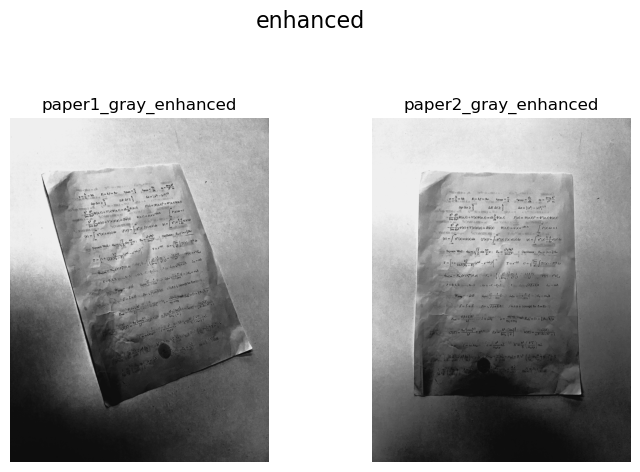

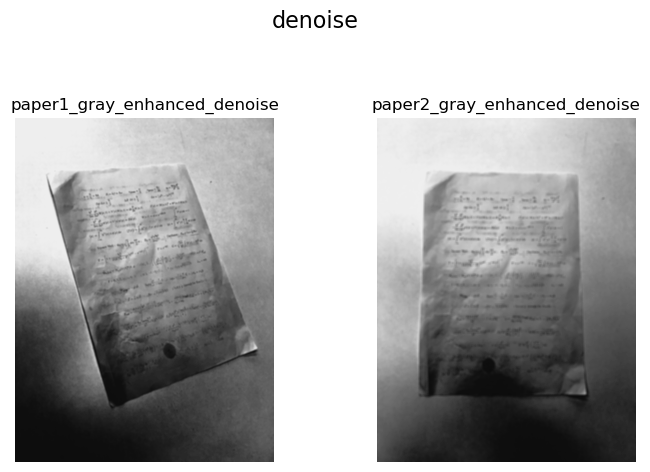

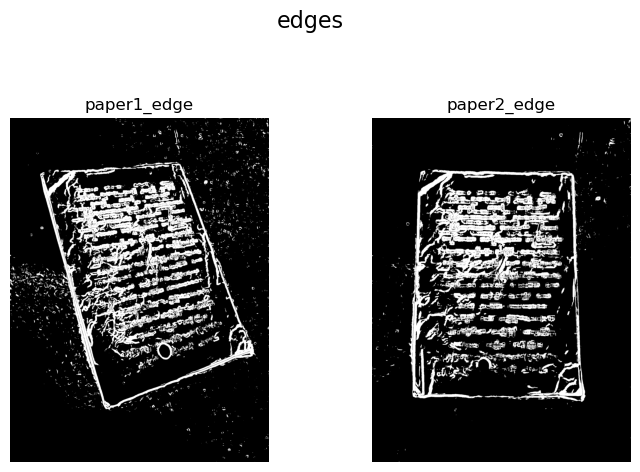

In [4]:
paper1_gray = Image.gray_scale(paper1)
paper2_gray = Image.gray_scale(paper2)

paper1_gray_enhanced = Image.hist_equalize(paper1_gray, 0, 16)
paper2_gray_enhanced = Image.hist_equalize(paper2_gray, 0, 16)

paper1_gray_enhanced_denoise = Image.mean_denoise(paper1_gray_enhanced, 0, 11)
paper2_gray_enhanced_denoise = Image.mean_denoise(paper2_gray_enhanced, 0, 15)

paper1_edge = Image.sobel_edge(paper1_gray_enhanced_denoise, 0, 5, "none", "hysteresis", { "low_threshold": 80, "high_threshold": 200 })
paper2_edge = Image.sobel_edge(paper2_gray_enhanced_denoise, 0, 5, "none", "hysteresis", { "low_threshold": 60, "high_threshold": 200 })

show_images([paper1_gray, paper2_gray], ["paper1_gray", "paper2_gray"], "gray")
show_images([paper1_gray_enhanced, paper2_gray_enhanced], ["paper1_gray_enhanced", "paper2_gray_enhanced"], "enhanced")
show_images([paper1_gray_enhanced_denoise, paper2_gray_enhanced_denoise], ["paper1_gray_enhanced_denoise", "paper2_gray_enhanced_denoise"], "denoise")
show_images([paper1_edge, paper2_edge], ["paper1_edge", "paper2_edge"], "edges")

In [5]:
paper1_contours = paper1_edge.get_edge_contours()
paper2_contours = paper2_edge.get_edge_contours()

def get_bounding_box(contours):
    longest_contour = max(contours, key=len)
    top_left = min(longest_contour, key=lambda point: (point[0] + point[1]))
    bottom_left = min(longest_contour, key=lambda point: (point[0] - point[1]))
    top_right = max(longest_contour, key=lambda point: (point[0] - point[1]))
    bottom_right = max(longest_contour, key=lambda point: (point[0] + point[1]))
    return top_left, bottom_left, top_right, bottom_right

bounding_box1 = get_bounding_box(paper1_contours)
bounding_box2 = get_bounding_box(paper2_contours)

print("Bounding box 1:", bounding_box1)
print("Bounding box 2:", bounding_box2)

Bounding box 1: ((180, 337), (566, 1731), (944, 287), (1454, 1416))
Bounding box 2: ((356, 319), (243, 1659), (1188, 335), (1253, 1684))


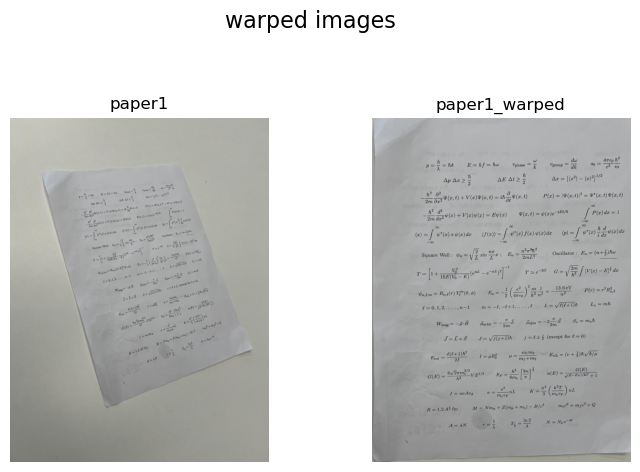

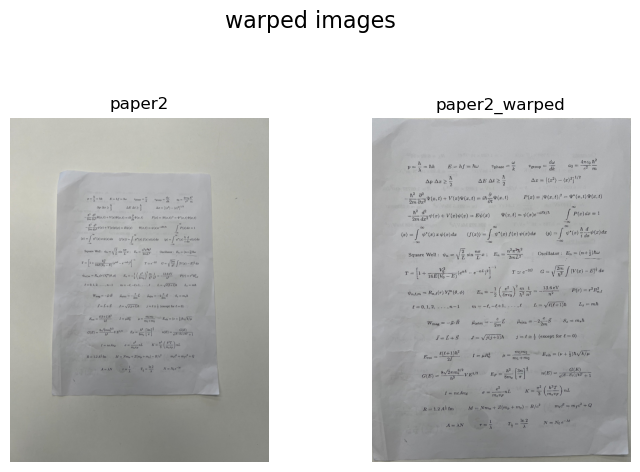

In [6]:
paper1_warped = Image.perspective_warp(paper1, bounding_box1)
paper2_warped = Image.perspective_warp(paper2, bounding_box2)

paper1_warped.save("output/paper1_warped.raw")
paper2_warped.save("output/paper2_warped.raw")

show_images([paper1, paper1_warped], ["paper1", "paper1_warped"], "warped images")
show_images([paper2, paper2_warped], ["paper2", "paper2_warped"], "warped images")